# Agenda
1. Identificar Problema
2. Cargar datos
3. Clasificar datos usando regresion logistica
4. Uso del modelo para predecir

## 1. Identificar el problema

predecir si un lote de articulos sera defectuoso o no

## 2. Cargar datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargar datos
df=pd.read_excel('datos-logisticos.xlsx')
df.head()

In [4]:
x1 = 'Productos-Lote'
x2 = 'Tiempo-Entrega'
y = 'Defectuoso'

X = df[[x1, x2]].values
Y = df[y].values

# Entrenar el modelo con los datos
model = LogisticRegression(solver='liblinear')
model.fit(X, Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


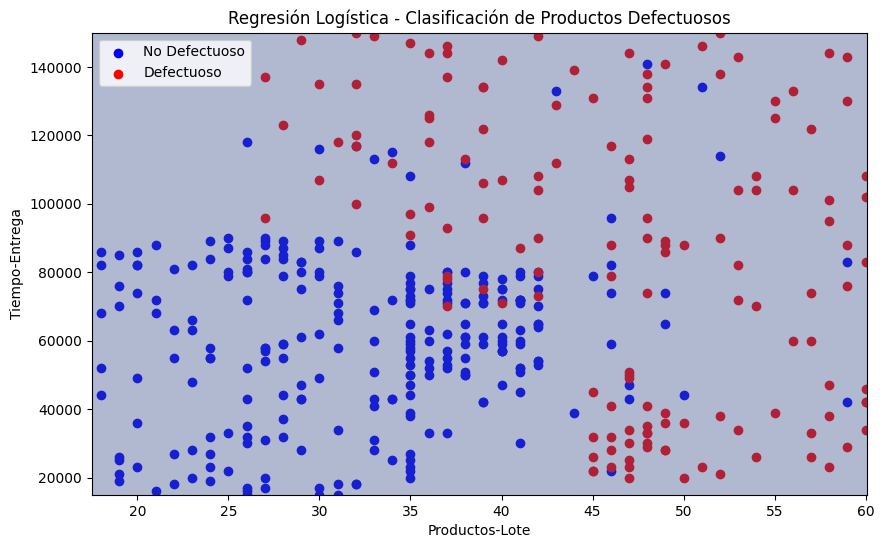

In [16]:
# Crear maya con los datos
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir en la maya
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear registros de grafico de dispersión
plt.figure(figsize=(10,6))
plt.scatter(X[Y==0][:,0], X[Y==0][:,1], color='blue', label='No Defectuoso')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], color='red', label='Defectuoso')
# Dibujar la frontera
plt.contourf(xx, yy, Z, alpha=0.4)
# Añadir etiquetas y título
plt.xlabel(x1)
plt.ylabel(x2)
plt.title('Regresión Logística - Clasificación de Productos Defectuosos')
plt.legend()
plt.show()

In [ ]:
# Crear un escalador
scaler = StandardScaler()
# Ajustar el escalador a los datos
X_scaled = scaler.fit_transform(X)
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)